# Summarise key measurements

To begin with we will simply plot the L_IR from CIGALE as a function of z

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))


This notebook was run with herschelhelp_internal version: 
1407877 (Mon Feb 4 12:56:29 2019 +0000)


In [48]:
import pyvo as vo
import glob
import time
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as mpl_cm
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable

import random

import herschelhelp as hh
from herschelhelp_internal.utils import flux_to_mag

from astropy.table import Table, Column, vstack, join, unique

In [3]:
tab = Table.read('../../../dmu32/dmu32_AllSky/data/HELP_all_sky_A-list_20201111.fits')[
    'field',
    'redshift',
    'cigale_sfr',
    #'cigale_sfr_err',
    'cigale_mstar',
    #'cigale_mstar_err',
    'cigale_dustlumin',
    #'cigale_dustlumin_err',
    #'cigale_dustlumin_ironly',
    #'cigale_dustlumin_ironly_err',
    'cigale_chi2_opt',
    'cigale_chi2_ir',
    'cigale_chi2_red',
    #'cigale_chi2_ironly'
]

tab['log_cigale_dustlumin']=np.log10(tab['cigale_dustlumin']/(3.684*pow(10,26)))

/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


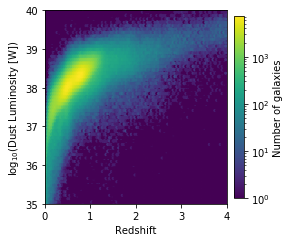

In [4]:
fig, ax = plt.subplots()
x_lims=[0.,4.]
y_lims=[35,40]
#ax.scatter(tab['redshift'], np.log10(tab['cigale_dustlumin']),s=0.01,alpha=0.1, rasterized=True)
mask = tab['redshift'] > x_lims[0]
mask &= tab['redshift'] < x_lims[1]
mask &= np.log10(tab['cigale_dustlumin']) > y_lims[0]
mask &= np.log10(tab['cigale_dustlumin']) < y_lims[1]
im = ax.hexbin(tab['redshift'][mask], np.log10(tab['cigale_dustlumin'][mask]),  bins="log")#cmap='Oranges',

fig.colorbar(im, ax=ax, label="Number of galaxies",fraction=0.046, pad=0.04)
#ax.axis('equal')

plt.xlim(x_lims)
plt.xlabel('Redshift')
plt.ylim(y_lims)
plt.ylabel('log$_{10}$(Dust Luminosity [W])')
#plt.yscale('log')

#plt.rc('font', family='serif', serif='Times')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1 * column_width_cm
hieght_cm = width_cm #/ 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/redshift_cigale_dustlumin.pdf', bbox_inches='tight')
plt.savefig('./figs/redshift_cigale_dustlumin.png', bbox_inches='tight')

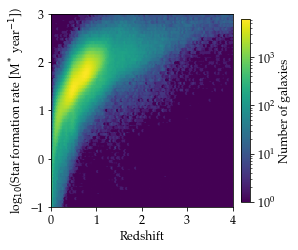

In [5]:
fig, ax = plt.subplots()
x_lims=[0.,4.]
y_lims=[-1,3]
#ax.scatter(tab['redshift'], np.log10(tab['cigale_dustlumin']),s=0.01,alpha=0.1, rasterized=True)
mask = tab['redshift'] > x_lims[0]
mask &= tab['redshift'] < x_lims[1]
mask &= np.log10(tab['cigale_sfr']) > y_lims[0]
mask &= np.log10(tab['cigale_sfr']) < y_lims[1]
im = ax.hexbin(tab['redshift'][mask], np.log10(tab['cigale_sfr'][mask]),  bins="log")

fig.colorbar(im, ax=ax, label="Number of galaxies",fraction=0.046, pad=0.04)
#ax.axis('equal')

plt.xlim(x_lims)
plt.xlabel('Redshift')
plt.ylim(y_lims)
plt.yticks(np.arange(np.min(y_lims), int(np.ceil(y_lims[1]))+1))
plt.ylabel(r'log$_{10}$(Star formation rate [M$^*$ year$^{-1}$])')
#plt.yscale('log')

#plt.rc('font', family='serif', serif='Times')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1 * column_width_cm
hieght_cm = width_cm #/ 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/redshift_cigale_sfr.pdf', bbox_inches='tight')
plt.savefig('./figs/redshift_cigale_sfr.png', bbox_inches='tight')

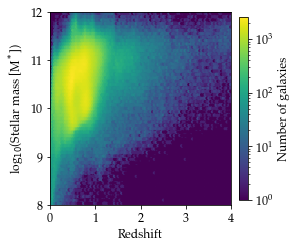

In [6]:
fig, ax = plt.subplots()
x_lims=[0.,4.]
y_lims=[8,12]
#ax.scatter(tab['redshift'], np.log10(tab['cigale_dustlumin']),s=0.01,alpha=0.1, rasterized=True)
mask = tab['redshift'] > x_lims[0]
mask &= tab['redshift'] < x_lims[1]
mask &= np.log10(tab['cigale_mstar']) > y_lims[0]
mask &= np.log10(tab['cigale_mstar']) < y_lims[1]
im = ax.hexbin(tab['redshift'][mask], np.log10(tab['cigale_mstar'][mask]),  bins="log")

fig.colorbar(im, ax=ax, label="Number of galaxies",fraction=0.046, pad=0.04)
#ax.axis('equal')

plt.xlim(x_lims)

plt.xlabel('Redshift')
plt.ylim(y_lims)
plt.yticks(np.arange(np.min(y_lims), int(np.ceil(y_lims[1]))+1))
plt.ylabel('log$_{10}$(Stellar mass [M$^*$])')
#plt.yscale('log')

#plt.rc('font', family='serif', serif='Times')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1 * column_width_cm
hieght_cm = width_cm #/ 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/redshift_cigale_mstar.pdf', bbox_inches='tight')
plt.savefig('./figs/redshift_cigale_mstar.png', bbox_inches='tight')

Full sample 
 number of objects: 1718100 
 chi2 reduced cut (75 percentiles): 1.40 
 after all cuts: 1281426
Bootes: number of objects: 38980 
 chi2 reduced cut: 1.78 
 after all cuts: 28242
Herschel-Stripe-82: number of objects: 250644 
 chi2 reduced cut: 1.43 
 after all cuts: 185299


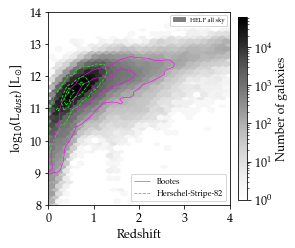

In [7]:
fig, ax = plt.subplots()

#redshift cut
x_lims=[0,4]
#logLdust cut
y_lims=[8,14]
#reduced chi2 cut (percentiles):  
max_percentiles=75

field_name1="Bootes"
field_name2="Herschel-Stripe-82"


mask = tab['redshift'] > x_lims[0]
mask &= tab['redshift'] < x_lims[1]
mask &= tab['log_cigale_dustlumin'] > y_lims[0]
mask &= tab['log_cigale_dustlumin'] < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles 
mask &= tab['cigale_chi2_opt'] < np.percentile(tab['cigale_chi2_opt'][mask], max_percentiles)
print("Full sample \n number of objects: %d \n chi2 reduced cut (%d percentiles): %.2f \n after all cuts: %d" %(
    len(tab),max_percentiles,np.percentile(tab['cigale_chi2_opt'][mask], max_percentiles),len(tab[mask])))

im=ax.hexbin(tab['redshift'][mask], tab['log_cigale_dustlumin'][mask],  bins="log", cmap="Greys", gridsize=(25,25))

################ First field ##########################

field1=tab[(tab['field']==field_name1)]
mask = field1['redshift'] > x_lims[0]
mask &= field1['redshift'] < x_lims[1]
mask &= field1['log_cigale_dustlumin'] > y_lims[0]
mask &= field1['log_cigale_dustlumin'] < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles
mask &= field1['cigale_chi2_opt'] <np.percentile(field1['cigale_chi2_opt'][mask], max_percentiles)
print("%s: number of objects: %d \n chi2 reduced cut: %.2f \n after all cuts: %d" %(
    field_name1, len(field1),np.percentile(field1['cigale_chi2_opt'][mask], max_percentiles), len(field1[mask])))


H1, xedges1, yedges1 = np.histogram2d(field1['redshift'][mask], field1['log_cigale_dustlumin'][mask], bins=(20,50))
xmesh1, ymesh1 = np.meshgrid(xedges1[:-1], yedges1[:-1])


vmin1 =  len(field1)*0.0015
vmax1 =  len(field1)*0.04
vstep1=  (vmax1-vmin1)/8
levels1 = np.arange(vmin1, vmax1+vstep1, vstep1)


cntr1 = ax.contour(xmesh1,ymesh1,H1.T,colors="magenta", levels=levels1, linewidths=0.6)

################ Second field ##########################

field2=tab[(tab['field']==field_name2)]
mask = field2['redshift'] > x_lims[0]
mask &= field2['redshift'] < x_lims[1]
mask &= field2['log_cigale_dustlumin'] > y_lims[0]
mask &= field2['log_cigale_dustlumin'] < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles
mask &= field2['cigale_chi2_opt'] < np.percentile(field2['cigale_chi2_opt'][mask], max_percentiles)
print("%s: number of objects: %d \n chi2 reduced cut: %.2f \n after all cuts: %d" %(
    field_name2, len(field2),np.percentile(field2['cigale_chi2_opt'][mask], max_percentiles), len(field2[mask])))


H2, xedges2, yedges2 = np.histogram2d(field2['redshift'][mask], field2['log_cigale_dustlumin'][mask], bins=(70,20))
xmesh2, ymesh2 = np.meshgrid(xedges2[:-1], yedges2[:-1])

vmin2 =  len(field2)*0.0015
vmax2 =  len(field2)*0.04
vstep2=  (vmax2-vmin2)/4
levels2 = np.arange(vmin2, vmax2+vstep2, vstep2)

cntr2 = ax.contour(xmesh2,ymesh2,H2.T,colors="lime", levels=levels2, linewidths=0.8,linestyles="dashed")


fig.colorbar(im, ax=ax, label="Number of galaxies",fraction=0.046, pad=0.04)
plt.xlim(x_lims)
plt.xlabel('Redshift')
plt.ylim(y_lims)
plt.yticks(np.arange(np.min(y_lims), int(np.ceil(y_lims[1]))+1))
plt.ylabel('log$_{10}($L$_{dust}$) [L$_{\odot}$]')

plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)


################ LEGENDs ##########################
h1,_ = cntr1.legend_elements()
h2,_ = cntr2.legend_elements()
gray_path = mpatches.Patch(color='gray', label='HELP all sky')

leg1=ax.legend([h1[0], h2[0]],[field_name1, field_name2], loc='lower right',prop={'size': 8})
leg2=ax.legend(handles=[gray_path],prop={'size': 6})

ax.add_artist(leg1)

#plt.rc('font', family='serif', serif='Times')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1 * column_width_cm
hieght_cm = width_cm #/ 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/redshift_cigale_dustlumin.pdf', bbox_inches='tight')
plt.savefig('./figs/redshift_cigale_dustlumin.png', bbox_inches='tight')


In [25]:
m = tab['cigale_sfr']/tab['cigale_dustlumin'] < np.inf
ratios = tab[m]['cigale_sfr']/tab[m]['cigale_dustlumin']
print(
    np.nanmean(ratios),
    np.nanmedian(ratios),
    np.percentile(ratios,0.1),
    np.percentile(ratios,99.9))

/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


0.0004855177167394167 2.8193458357506427e-37 1.400305119151569e-37 9.554372380908238e-35


-9.98350641852485 -9.969809410615298


Text(0.5, 0, 'sfr/dustlumin')

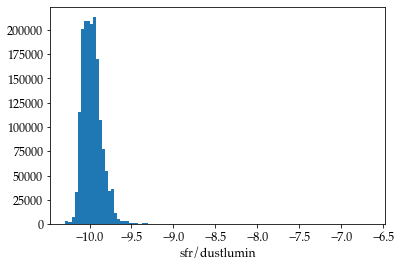

In [33]:
m = np.log10(tab['cigale_sfr']) - tab['log_cigale_dustlumin'] < np.inf

ratios = np.log10(tab['cigale_sfr']) - tab['log_cigale_dustlumin']
m &= ratios>np.percentile(ratios,0.1)
m&= ratios < np.percentile(ratios,99.9)

ratios = ratios[m]

print(np.median(ratios),np.mean(ratios))
plt.hist(ratios, bins =100)
#plt.xlim()
plt.xlabel('sfr/dustlumin')
#plt.xscale('log')
#plt.yscale('log')

In [44]:
[-2,-1,0,1,2,3,4] - np.median(ratios)

array([ 7.98350642,  8.98350642,  9.98350642, 10.98350642, 11.98350642,
       12.98350642, 13.98350642])

In [14]:
[np.percentile(ratios,0.1),np.percentile(ratios,99.9)]

[1.400305119151569e-37, 9.554372380908238e-35]

Full sample 
 number of objects: 1718100 
 chi2 reduced cut (75 percentiles): 1.40 
 after all cuts: 1281426
Bootes: number of objects: 38980 
 chi2 reduced cut: 1.78 
 after all cuts: 28242
Herschel-Stripe-82: number of objects: 250644 
 chi2 reduced cut: 1.43 
 after all cuts: 185299


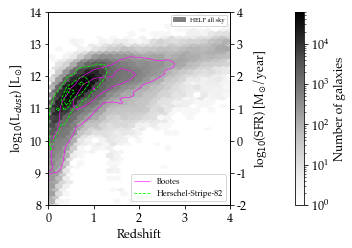

In [56]:
fig, ax = plt.subplots()

#redshift cut
x_lims=[0,4]
#logLdust cut
y_lims=[8,14]
#reduced chi2 cut (percentiles):  
max_percentiles=75

field_name1="Bootes"
field_name2="Herschel-Stripe-82"


mask = tab['redshift'] > x_lims[0]
mask &= tab['redshift'] < x_lims[1]
mask &= tab['log_cigale_dustlumin'] > y_lims[0]
mask &= tab['log_cigale_dustlumin'] < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles 
mask &= tab['cigale_chi2_opt'] < np.percentile(tab['cigale_chi2_opt'][mask], max_percentiles)
print("Full sample \n number of objects: %d \n chi2 reduced cut (%d percentiles): %.2f \n after all cuts: %d" %(
    len(tab),max_percentiles,np.percentile(tab['cigale_chi2_opt'][mask], max_percentiles),len(tab[mask])))

im=ax.hexbin(tab['redshift'][mask], tab['log_cigale_dustlumin'][mask],  bins="log", cmap="Greys", gridsize=(25,25))





################ First field ##########################

field1=tab[(tab['field']==field_name1)]
mask = field1['redshift'] > x_lims[0]
mask &= field1['redshift'] < x_lims[1]
mask &= field1['log_cigale_dustlumin'] > y_lims[0]
mask &= field1['log_cigale_dustlumin'] < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles
mask &= field1['cigale_chi2_opt'] <np.percentile(field1['cigale_chi2_opt'][mask], max_percentiles)
print("%s: number of objects: %d \n chi2 reduced cut: %.2f \n after all cuts: %d" %(
    field_name1, len(field1),np.percentile(field1['cigale_chi2_opt'][mask], max_percentiles), len(field1[mask])))


H1, xedges1, yedges1 = np.histogram2d(field1['redshift'][mask], field1['log_cigale_dustlumin'][mask], bins=(20,50))
xmesh1, ymesh1 = np.meshgrid(xedges1[:-1], yedges1[:-1])


vmin1 =  len(field1)*0.0015
vmax1 =  len(field1)*0.04
vstep1=  (vmax1-vmin1)/8
levels1 = np.arange(vmin1, vmax1+vstep1, vstep1)


cntr1 = ax.contour(xmesh1,ymesh1,H1.T,colors="magenta", levels=levels1, linewidths=0.6)

################ Second field ##########################

field2=tab[(tab['field']==field_name2)]
mask = field2['redshift'] > x_lims[0]
mask &= field2['redshift'] < x_lims[1]
mask &= field2['log_cigale_dustlumin'] > y_lims[0]
mask &= field2['log_cigale_dustlumin'] < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles
mask &= field2['cigale_chi2_opt'] < np.percentile(field2['cigale_chi2_opt'][mask], max_percentiles)
print("%s: number of objects: %d \n chi2 reduced cut: %.2f \n after all cuts: %d" %(
    field_name2, len(field2),np.percentile(field2['cigale_chi2_opt'][mask], max_percentiles), len(field2[mask])))


H2, xedges2, yedges2 = np.histogram2d(field2['redshift'][mask], field2['log_cigale_dustlumin'][mask], bins=(70,20))
xmesh2, ymesh2 = np.meshgrid(xedges2[:-1], yedges2[:-1])

vmin2 =  len(field2)*0.0015
vmax2 =  len(field2)*0.04
vstep2=  (vmax2-vmin2)/4
levels2 = np.arange(vmin2, vmax2+vstep2, vstep2)

cntr2 = ax.contour(xmesh2,ymesh2,H2.T,colors="lime", levels=levels2, linewidths=0.8,linestyles="dashed")

#divider = make_axes_locatable(ax)
#cax = divider.new_vertical(size='5%', pad=0.4)
#fig.add_axes(cax)
#fig.colorbar(im, cax=cax, orientation='horizontal')
#ax_divider = make_axes_locatable(ax)
# add an axes above the main axes.
#cax = ax_divider.append_axes("top", size="7%", pad="2%")
#cb = fig.colorbar(im, cax=cax, orientation="horizontal")
fig.colorbar(im, ax=ax, label="Number of galaxies",fraction=0.046, pad=0.25)#,orientation='horizontal')
plt.xlim(x_lims)
plt.xlabel('Redshift')
plt.ylim(y_lims)
plt.yticks(np.arange(np.min(y_lims), int(np.ceil(y_lims[1]))+1))
plt.ylabel('log$_{10}($L$_{dust}$) [L$_{\odot}$]')

plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)


################ LEGENDs ##########################
h1,_ = cntr1.legend_elements()
h2,_ = cntr2.legend_elements()
gray_path = mpatches.Patch(color='gray', label='HELP all sky')

leg1=ax.legend([h1[0], h2[0]],[field_name1, field_name2], loc='lower right',prop={'size': 8})
leg2=ax.legend(handles=[gray_path],prop={'size': 6})

ax.add_artist(leg1)




ax2 = ax.twinx()

ax2.set_ylim(y_lims)
sfr_ticks = [-2, -1,0,1,2,3,4]
ax2.set_yticks(sfr_ticks - np.median(ratios))
ax2.set_yticklabels(sfr_ticks)
ax2.set_ylabel('log$_{10}$(SFR) [M$_{\odot}$/year]')


#plt.rc('font', family='serif', serif='Times')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.3 * column_width_cm
hieght_cm = column_width_cm
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/redshift_cigale_dustlumin.pdf', bbox_inches='tight')
plt.savefig('./figs/redshift_cigale_dustlumin.png', bbox_inches='tight')


Full sample 
 number of objects: 1718100 
 chi2 reduced cut (75 percentiles): 1.40 
 after all cuts: 1276232
Bootes: number of objects: 38980 
 chi2 reduced cut: 1.78 
 after all cuts: 27732
Herschel-Stripe-82: number of objects: 250644 
 chi2 reduced cut: 1.41 
 after all cuts: 183246


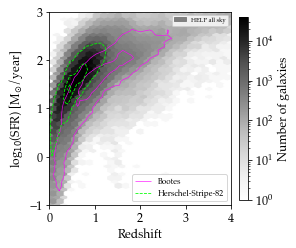

In [8]:
fig, ax = plt.subplots()

#redshift cut
x_lims=[0,4]
#logLdust cut
y_lims=[-1,3]
#reduced chi2 cut (percentiles):  
max_percentiles=75

field_name1="Bootes"
field_name2="Herschel-Stripe-82"


mask = tab['redshift'] > x_lims[0]
mask &= tab['redshift'] < x_lims[1]
mask &= np.log10(tab['cigale_sfr']) > y_lims[0]
mask &= np.log10(tab['cigale_sfr']) < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles 
mask &= tab['cigale_chi2_opt'] < np.percentile(tab['cigale_chi2_opt'][mask], max_percentiles)
print("Full sample \n number of objects: %d \n chi2 reduced cut (%d percentiles): %.2f \n after all cuts: %d" %(
    len(tab),max_percentiles,np.percentile(tab['cigale_chi2_opt'][mask], max_percentiles),len(tab[mask])))

im=ax.hexbin(tab['redshift'][mask], np.log10(tab['cigale_sfr'])[mask],  bins="log", cmap="Greys", gridsize=(25,25))

################ First field ##########################

field1=tab[(tab['field']==field_name1)]
mask = field1['redshift'] > x_lims[0]
mask &= field1['redshift'] < x_lims[1]
mask &= np.log10(field1['cigale_sfr']) > y_lims[0]
mask &= np.log10(field1['cigale_sfr']) < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles
mask &= field1['cigale_chi2_opt'] <np.percentile(field1['cigale_chi2_opt'][mask], max_percentiles)
print("%s: number of objects: %d \n chi2 reduced cut: %.2f \n after all cuts: %d" %(
    field_name1, len(field1),np.percentile(field1['cigale_chi2_opt'][mask], max_percentiles), len(field1[mask])))


H1, xedges1, yedges1 = np.histogram2d(field1['redshift'][mask], np.log10(field1['cigale_sfr'])[mask], bins=(20,50))
xmesh1, ymesh1 = np.meshgrid(xedges1[:-1], yedges1[:-1])


vmin1 =  len(field1)*0.0015
vmax1 =  len(field1)*0.04
vstep1=  (vmax1-vmin1)/8
levels1 = np.arange(vmin1, vmax1+vstep1, vstep1)


cntr1 = ax.contour(xmesh1,ymesh1,H1.T,colors="magenta", levels=levels1, linewidths=0.6)

################ Second field ##########################

field2=tab[(tab['field']==field_name2)]
mask = field2['redshift'] > x_lims[0]
mask &= field2['redshift'] < x_lims[1]
mask &= np.log10(field2['cigale_sfr']) > y_lims[0]
mask &= np.log10(field2['cigale_sfr']) < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles
mask &= field2['cigale_chi2_opt'] < np.percentile(field2['cigale_chi2_opt'][mask], max_percentiles)
print("%s: number of objects: %d \n chi2 reduced cut: %.2f \n after all cuts: %d" %(
    field_name2, len(field2),np.percentile(field2['cigale_chi2_opt'][mask], max_percentiles), len(field2[mask])))


H2, xedges2, yedges2 = np.histogram2d(field2['redshift'][mask], np.log10(field2['cigale_sfr'])[mask], bins=(70,20))
xmesh2, ymesh2 = np.meshgrid(xedges2[:-1], yedges2[:-1])

vmin2 =  len(field2)*0.0015
vmax2 =  len(field2)*0.04
vstep2=  (vmax2-vmin2)/4
levels2 = np.arange(vmin2, vmax2+vstep2, vstep2)

cntr2 = ax.contour(xmesh2,ymesh2,H2.T,colors="lime", levels=levels2, linewidths=0.8,linestyles="dashed")


fig.colorbar(im, ax=ax, label="Number of galaxies",fraction=0.046, pad=0.04)
plt.xlim(x_lims)
plt.xlabel('Redshift')
plt.ylim(y_lims)
plt.yticks(np.arange(np.min(y_lims), int(np.ceil(y_lims[1]))+1))
plt.ylabel('log$_{10}$(SFR) [M$_{\odot}$/year]')

plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)


################ LEGENDs ##########################
h1,_ = cntr1.legend_elements()
h2,_ = cntr2.legend_elements()
gray_path = mpatches.Patch(color='gray', label='HELP all sky')

leg1=ax.legend([h1[0], h2[0]],[field_name1, field_name2], loc='lower right',prop={'size': 8})
leg2=ax.legend(handles=[gray_path],prop={'size': 6})

ax.add_artist(leg1)

#plt.rc('font', family='serif', serif='Times')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1 * column_width_cm
hieght_cm = width_cm #/ 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/redshift_cigale_sfr.pdf', bbox_inches='tight')
plt.savefig('./figs/redshift_cigale_sfr.png', bbox_inches='tight')


Full sample 
 number of objects: 1718100 
 chi2 reduced cut (75 percentiles): 1.40 
 after all cuts: 1277895
Bootes: number of objects: 38980 
 chi2 reduced cut: 1.81 
 after all cuts: 28102
Herschel-Stripe-82: number of objects: 250644 
 chi2 reduced cut: 1.41 
 after all cuts: 183155


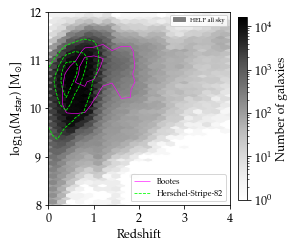

In [57]:
fig, ax = plt.subplots()

#redshift cut
x_lims=[0,4]
#logLdust cut
y_lims=[8,12]
#reduced chi2 cut (percentiles):  
max_percentiles=75

field_name1="Bootes"
field_name2="Herschel-Stripe-82"


mask = tab['redshift'] > x_lims[0]
mask &= tab['redshift'] < x_lims[1]
mask &= np.log10(tab['cigale_mstar']) > y_lims[0]
mask &= np.log10(tab['cigale_mstar']) < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles 
mask &= tab['cigale_chi2_opt'] < np.percentile(tab['cigale_chi2_opt'][mask], max_percentiles)
print("Full sample \n number of objects: %d \n chi2 reduced cut (%d percentiles): %.2f \n after all cuts: %d" %(
    len(tab),max_percentiles,np.percentile(tab['cigale_chi2_opt'][mask], max_percentiles),len(tab[mask])))

im=ax.hexbin(tab['redshift'][mask], np.log10(tab['cigale_mstar'])[mask],  bins="log", cmap="Greys", gridsize=(20,30))

################ First field ##########################

field1=tab[(tab['field']==field_name1)]
mask = field1['redshift'] > x_lims[0]
mask &= field1['redshift'] < x_lims[1]
mask &= np.log10(field1['cigale_mstar']) > y_lims[0]
mask &= np.log10(field1['cigale_mstar']) < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles
mask &= field1['cigale_chi2_opt'] <np.percentile(field1['cigale_chi2_opt'][mask], max_percentiles)
print("%s: number of objects: %d \n chi2 reduced cut: %.2f \n after all cuts: %d" %(
    field_name1, len(field1),np.percentile(field1['cigale_chi2_opt'][mask], max_percentiles), len(field1[mask])))


H1, xedges1, yedges1 = np.histogram2d(
    field1['redshift'][mask], np.log10(field1['cigale_mstar'])[mask], bins=(20,25))
xmesh1, ymesh1 = np.meshgrid(xedges1[:-1], yedges1[:-1])


vmin1 =  len(field1)*0.004
vmax1 =  len(field1)*0.04
vstep1=  (vmax1-vmin1)/8
levels1 = np.arange(vmin1, vmax1+vstep1, vstep1)


cntr1 = ax.contour(xmesh1,ymesh1,H1.T,colors="magenta", levels=levels1, linewidths=0.6)

################ Second field ##########################

field2=tab[(tab['field']==field_name2)]
mask = field2['redshift'] > x_lims[0]
mask &= field2['redshift'] < x_lims[1]
mask &= np.log10(field2['cigale_mstar']) > y_lims[0]
mask &= np.log10(field2['cigale_mstar']) < y_lims[1]
#I am removing all wrong fits by the simple cut of the reduced chi2 by removing all galaxies with reduced chi2 above XX percentiles
mask &= field2['cigale_chi2_opt'] < np.percentile(field2['cigale_chi2_opt'][mask], max_percentiles)
print("%s: number of objects: %d \n chi2 reduced cut: %.2f \n after all cuts: %d" %(
    field_name2, len(field2),np.percentile(field2['cigale_chi2_opt'][mask], max_percentiles), len(field2[mask])))


H2, xedges2, yedges2 = np.histogram2d(
    field2['redshift'][mask], np.log10(field2['cigale_mstar'])[mask], bins=(20,25)) #, bins=(70,20))
xmesh2, ymesh2 = np.meshgrid(xedges2[:-1], yedges2[:-1])


#gridsize=(20,30), Bootes & HS82:  bins=(20,25) and:  vmin1 = len(field1)*0.004
#vmax1 = len(field1)*0.04
#vstep1= (vmax1-vmin1)/8  (edited) 

#and vmin2 = len(field2)*0.004
#vmax2 = len(field2)*0.04
#vstep2= (vmax2-vmin2)/4
vmin2 =  len(field2)*0.004
vmax2 =  len(field2)*0.04
vstep2=  (vmax2-vmin2)/4
levels2 = np.arange(vmin2, vmax2+vstep2, vstep2)

cntr2 = ax.contour(xmesh2,ymesh2,H2.T,colors="lime", levels=levels2, linewidths=0.8,linestyles="dashed")


fig.colorbar(im, ax=ax, label="Number of galaxies",fraction=0.046, pad=0.04)
plt.xlim(x_lims)
plt.xlabel('Redshift')
plt.ylim(y_lims)
plt.yticks(np.arange(np.min(y_lims), int(np.ceil(y_lims[1]))+1))
plt.ylabel('log$_{10}($M$_{star}$) [M$_{\odot}$]')

plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)


################ LEGENDs ##########################
h1,_ = cntr1.legend_elements()
h2,_ = cntr2.legend_elements()
gray_path = mpatches.Patch(color='gray', label='HELP all sky')

leg1=ax.legend([h1[0], h2[0]],[field_name1, field_name2], loc='lower right',prop={'size': 8})
leg2=ax.legend(handles=[gray_path],prop={'size': 6})

ax.add_artist(leg1)

#plt.rc('font', family='serif', serif='Times')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1 * column_width_cm
hieght_cm = width_cm #/ 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/redshift_cigale_mstar.pdf', bbox_inches='tight')
plt.savefig('./figs/redshift_cigale_mstar.png', bbox_inches='tight')
